Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

ModuleNotFoundError: No module named 'google.colab'

Change Directory to Working Directory

In [2]:
import os
import matplotlib.pyplot as plt

#print(os.getcwd())
os.chdir('/content/gdrive/My Drive/ECE114F19_SpeechMLproj')
!ls


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/gdrive/My Drive/ECE114F19_SpeechMLproj'

Load Data

In [6]:
import numpy as np
import scipy.io as sio
import sklearn
from sklearn.model_selection import train_test_split


X=sio.loadmat('feat_vec.mat')
y=sio.loadmat('labels')

X_data=X['feat_vec']
y_data=y['labels']


X_train_val, X_test, y_train_val, y_test= train_test_split(X_data, y_data, test_size=0.15)

X_train, X_val, y_train, y_val= train_test_split(X_train_val, y_train_val, test_size=0.15)



print ('Training/Valid data shape: {}'.format(X_train_val.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_val.shape))
print ('Test target shape: {}'.format(y_test.shape))

Training/Valid data shape: (144, 12)
Test data shape: (26, 12)
Training/Valid target shape: (144, 1)
Test target shape: (26, 1)


One-hot encode labels

In [7]:
from sklearn.preprocessing import OneHotEncoder


onehot_encoder = OneHotEncoder(sparse=False, categories='auto')


y_train = onehot_encoder.fit_transform(y_train)
y_val = onehot_encoder.fit_transform(y_val)
y_test = onehot_encoder.fit_transform(y_test)

print(y_train.shape)


(122, 2)


Run Fully Connected (FeedForward) Network

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

model = Sequential()


model.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))         

Adam=optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)



model.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])

history=model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=100, epochs=100)


Train on 122 samples, validate on 22 samples
Epoch 1/100
122/122 [==============================] - 0s 2ms/step - loss: 0.7928 - accuracy: 0.4754 - val_loss: 0.6884 - val_accuracy: 0.5909
Epoch 2/100
122/122 [==============================] - 0s 73us/step - loss: 0.7790 - accuracy: 0.4754 - val_loss: 0.6830 - val_accuracy: 0.5909
Epoch 3/100
122/122 [==============================] - 0s 73us/step - loss: 0.7370 - accuracy: 0.4754 - val_loss: 0.6792 - val_accuracy: 0.5909
Epoch 4/100
122/122 [==============================] - 0s 73us/step - loss: 0.7676 - accuracy: 0.4590 - val_loss: 0.6773 - val_accuracy: 0.5909
Epoch 5/100
122/122 [==============================] - 0s 82us/step - loss: 0.7529 - accuracy: 0.4754 - val_loss: 0.6767 - val_accuracy: 0.5909
Epoch 6/100
122/122 [==============================] - 0s 98us/step - loss: 0.7176 - accuracy: 0.4672 - val_loss: 0.6772 - val_accuracy: 0.5909
Epoch 7/100
122/122 [==============================] - 0s 73us/step - loss: 0.7322 - accurac

Get validation and test scores

In [68]:
score_val = model.evaluate(X_val, y_val, batch_size=20)
score_test = model.evaluate(X_test, y_test, batch_size=20)

print('Validation [loss, accuracy] is ', score_val)
print('Test [loss, accuracy] is ', score_test)

26/26 [==============================] - 0s 651us/step
Validation [loss, accuracy] is  [0.6840943748300726, 0.5909091125835072]
Test [loss, accuracy] is  [0.704076546889085, 0.4230769230769231]


Get data formatted for RNN

In [8]:
import numpy as np
import scipy.io as sio
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X=sio.loadmat('feat_vec_rnn.mat')
y=sio.loadmat('labels')

print(X_data.shape)
print(y_data.shape)

X_data=X['feat_vec_rnn']
X_data=np.transpose(X_data, (2, 0, 1))

y_data=y['labels']


X_train_val, X_test, y_train_val, y_test= train_test_split(X_data, y_data, test_size=0.15, random_state = 31)

X_train, X_val, y_train, y_val= train_test_split(X_train_val, y_train_val, test_size=0.15, random_state = 21)



print ('Training/Valid data shape: {}'.format(X_train_val.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_val.shape))
print ('Test target shape: {}'.format(y_test.shape))

onehot_encoder = OneHotEncoder(sparse=False, categories='auto')

onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
y_train = onehot_encoder.fit_transform(y_train)
y_val = onehot_encoder.fit_transform(y_val)
y_test = onehot_encoder.fit_transform(y_test)

print(y_train.shape)

(170, 12)
(170, 1)
Training/Valid data shape: (144, 1363, 12)
Test data shape: (26, 1363, 12)
Training/Valid target shape: (144, 1)
Test target shape: (26, 1)
(122, 2)


Run LSTM

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import CuDNNLSTM
from keras.layers import MaxPooling1D
from keras import regularizers
from keras import optimizers
from keras import initializers
import numpy as np
import scipy.io as sio
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

history_list = []
for model_iter in range(5):
    X=sio.loadmat('feat_vec_rnn.mat')
    y=sio.loadmat('labels')

    print(X_data.shape)
    print(y_data.shape)

    X_data=X['feat_vec_rnn']
    X_data=np.transpose(X_data, (2, 0, 1))

    y_data=y['labels']


    X_train_val, X_test, y_train_val, y_test= train_test_split(X_data, y_data, test_size=0.15)

    X_train, X_val, y_train, y_val= train_test_split(X_train_val, y_train_val, test_size=0.15)



    print ('Training/Valid data shape: {}'.format(X_train_val.shape))
    print ('Test data shape: {}'.format(X_test.shape))
    print ('Training/Valid target shape: {}'.format(y_train_val.shape))
    print ('Test target shape: {}'.format(y_test.shape))

    onehot_encoder = OneHotEncoder(sparse=False, categories='auto')

    onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
    y_train = onehot_encoder.fit_transform(y_train)
    y_val = onehot_encoder.fit_transform(y_val)
    y_test = onehot_encoder.fit_transform(y_test)

    print(y_train.shape)

    n_samples = X_train.shape[0]  # number of data points
    n_features = X_train.shape[1]  # dimension of feature vector for each sample
    time_steps = X_train.shape[2] # how many samples across time were taken

    model = Sequential()

    model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, kernel_initializer='random_normal', input_shape=(n_features, time_steps)))

    model.add(MaxPooling1D(pool_size=(2), strides=2, padding='valid', data_format=None))

    model.add(LSTM(40, return_sequences=True))

    model.add(LSTM(30, return_sequences=False))

    model.add(Dense(2, activation='softmax', kernel_regularizer=regularizers.l1_l2(l1=0,l2=0.5)))

    #sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    Adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.99, amsgrad=False)

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam,
                  metrics=['accuracy'])

    history=model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=100, epochs=100)
    history_list.append(history)


(170, 1363, 12)
(170, 1)
Training/Valid data shape: (144, 1363, 12)
Test data shape: (26, 1363, 12)
Training/Valid target shape: (144, 1)
Test target shape: (26, 1)
(122, 2)
Train on 122 samples, validate on 22 samples
Epoch 1/100
122/122 [==============================] - 14s 116ms/step - loss: 2.5359 - accuracy: 0.6066 - val_loss: 2.5138 - val_accuracy: 0.7273
Epoch 2/100
122/122 [==============================] - 13s 105ms/step - loss: 2.5011 - accuracy: 0.6721 - val_loss: 2.5007 - val_accuracy: 0.7273
Epoch 3/100
122/122 [==============================] - 13s 103ms/step - loss: 2.4935 - accuracy: 0.6148 - val_loss: 2.4931 - val_accuracy: 0.7273
Epoch 4/100
122/122 [==============================] - 13s 104ms/step - loss: 2.4799 - accuracy: 0.6639 - val_loss: 2.4865 - val_accuracy: 0.7273
Epoch 5/100
122/122 [==============================] - 13s 106ms/step - loss: 2.4854 - accuracy: 0.6393 - val_loss: 2.4815 - val_accuracy: 0.7273
Epoch 6/100
122/122 [==============================

122/122 [==============================] - 13s 105ms/step - loss: 2.4381 - accuracy: 0.6393 - val_loss: 2.4414 - val_accuracy: 0.7273
Epoch 56/100
122/122 [==============================] - 13s 109ms/step - loss: 2.4385 - accuracy: 0.6066 - val_loss: 2.4411 - val_accuracy: 0.7273
Epoch 57/100
122/122 [==============================] - 13s 110ms/step - loss: 2.4412 - accuracy: 0.6148 - val_loss: 2.4408 - val_accuracy: 0.7273
Epoch 58/100
122/122 [==============================] - 13s 109ms/step - loss: 2.4291 - accuracy: 0.6311 - val_loss: 2.4406 - val_accuracy: 0.7273
Epoch 59/100
122/122 [==============================] - 13s 104ms/step - loss: 2.4336 - accuracy: 0.6639 - val_loss: 2.4403 - val_accuracy: 0.7273
Epoch 60/100
122/122 [==============================] - 13s 104ms/step - loss: 2.4263 - accuracy: 0.6475 - val_loss: 2.4400 - val_accuracy: 0.7273
Epoch 61/100
122/122 [==============================] - 13s 105ms/step - loss: 2.4392 - accuracy: 0.6148 - val_loss: 2.4398 - val_a

122/122 [==============================] - 14s 118ms/step - loss: 2.4905 - accuracy: 0.5984 - val_loss: 2.5450 - val_accuracy: 0.4545
Epoch 10/100
122/122 [==============================] - 15s 120ms/step - loss: 2.5107 - accuracy: 0.5492 - val_loss: 2.5435 - val_accuracy: 0.4545
Epoch 11/100
122/122 [==============================] - 15s 123ms/step - loss: 2.4832 - accuracy: 0.5984 - val_loss: 2.5423 - val_accuracy: 0.4545
Epoch 12/100
122/122 [==============================] - 15s 122ms/step - loss: 2.5007 - accuracy: 0.5492 - val_loss: 2.5412 - val_accuracy: 0.4545
Epoch 13/100
122/122 [==============================] - 15s 120ms/step - loss: 2.5007 - accuracy: 0.5410 - val_loss: 2.5402 - val_accuracy: 0.4545
Epoch 14/100
122/122 [==============================] - 15s 123ms/step - loss: 2.4830 - accuracy: 0.6311 - val_loss: 2.5393 - val_accuracy: 0.4545
Epoch 15/100
122/122 [==============================] - 15s 120ms/step - loss: 2.4871 - accuracy: 0.5738 - val_loss: 2.5385 - val_a

Epoch 65/100
122/122 [==============================] - 15s 120ms/step - loss: 2.4655 - accuracy: 0.5984 - val_loss: 2.5187 - val_accuracy: 0.4545
Epoch 66/100
122/122 [==============================] - 15s 119ms/step - loss: 2.4611 - accuracy: 0.6148 - val_loss: 2.5184 - val_accuracy: 0.4545
Epoch 67/100
122/122 [==============================] - 15s 120ms/step - loss: 2.4638 - accuracy: 0.5820 - val_loss: 2.5182 - val_accuracy: 0.4545
Epoch 68/100
122/122 [==============================] - 15s 125ms/step - loss: 2.4590 - accuracy: 0.5984 - val_loss: 2.5180 - val_accuracy: 0.4545
Epoch 69/100
122/122 [==============================] - 15s 122ms/step - loss: 2.4715 - accuracy: 0.5328 - val_loss: 2.5178 - val_accuracy: 0.4545
Epoch 70/100
122/122 [==============================] - 14s 119ms/step - loss: 2.4628 - accuracy: 0.5656 - val_loss: 2.5176 - val_accuracy: 0.4545
Epoch 71/100
122/122 [==============================] - 15s 120ms/step - loss: 2.4611 - accuracy: 0.5492 - val_loss: 2

122/122 [==============================] - 17s 137ms/step - loss: 2.7356 - accuracy: 0.6148 - val_loss: 2.7355 - val_accuracy: 0.5909
Epoch 20/100
122/122 [==============================] - 17s 136ms/step - loss: 2.7335 - accuracy: 0.6148 - val_loss: 2.7342 - val_accuracy: 0.5909
Epoch 21/100
122/122 [==============================] - 16s 130ms/step - loss: 2.7278 - accuracy: 0.6393 - val_loss: 2.7330 - val_accuracy: 0.5909
Epoch 22/100
122/122 [==============================] - 16s 131ms/step - loss: 2.7311 - accuracy: 0.6475 - val_loss: 2.7318 - val_accuracy: 0.5909
Epoch 23/100
122/122 [==============================] - 16s 134ms/step - loss: 2.7296 - accuracy: 0.6066 - val_loss: 2.7307 - val_accuracy: 0.5909
Epoch 24/100
122/122 [==============================] - 17s 137ms/step - loss: 2.7415 - accuracy: 0.5984 - val_loss: 2.7296 - val_accuracy: 0.5909
Epoch 25/100
122/122 [==============================] - 17s 135ms/step - loss: 2.7340 - accuracy: 0.5574 - val_loss: 2.7286 - val_a

Epoch 75/100
122/122 [==============================] - 16s 133ms/step - loss: 2.7039 - accuracy: 0.6148 - val_loss: 2.7050 - val_accuracy: 0.5909
Epoch 76/100
122/122 [==============================] - 16s 134ms/step - loss: 2.7103 - accuracy: 0.5902 - val_loss: 2.7047 - val_accuracy: 0.5909
Epoch 77/100
122/122 [==============================] - 17s 136ms/step - loss: 2.7102 - accuracy: 0.5984 - val_loss: 2.7045 - val_accuracy: 0.5909
Epoch 78/100
122/122 [==============================] - 16s 133ms/step - loss: 2.7160 - accuracy: 0.5656 - val_loss: 2.7042 - val_accuracy: 0.5909
Epoch 79/100
122/122 [==============================] - 16s 135ms/step - loss: 2.7084 - accuracy: 0.6311 - val_loss: 2.7040 - val_accuracy: 0.5909
Epoch 80/100
122/122 [==============================] - 16s 132ms/step - loss: 2.7116 - accuracy: 0.5984 - val_loss: 2.7038 - val_accuracy: 0.5909
Epoch 81/100
122/122 [==============================] - 16s 133ms/step - loss: 2.7120 - accuracy: 0.6066 - val_loss: 2

122/122 [==============================] - 20s 161ms/step - loss: 2.5468 - accuracy: 0.5902 - val_loss: 2.5760 - val_accuracy: 0.6364
Epoch 30/100
122/122 [==============================] - 19s 159ms/step - loss: 2.5681 - accuracy: 0.5492 - val_loss: 2.5755 - val_accuracy: 0.6364
Epoch 31/100
122/122 [==============================] - 19s 158ms/step - loss: 2.5515 - accuracy: 0.5820 - val_loss: 2.5750 - val_accuracy: 0.6364
Epoch 32/100
122/122 [==============================] - 19s 158ms/step - loss: 2.5394 - accuracy: 0.5984 - val_loss: 2.5745 - val_accuracy: 0.6364
Epoch 33/100
122/122 [==============================] - 19s 154ms/step - loss: 2.5399 - accuracy: 0.5902 - val_loss: 2.5741 - val_accuracy: 0.6364
Epoch 34/100
122/122 [==============================] - 19s 157ms/step - loss: 2.5585 - accuracy: 0.5738 - val_loss: 2.5737 - val_accuracy: 0.6364
Epoch 35/100
122/122 [==============================] - 19s 156ms/step - loss: 2.5503 - accuracy: 0.5984 - val_loss: 2.5732 - val_a

Epoch 85/100
122/122 [==============================] - 19s 160ms/step - loss: 2.5381 - accuracy: 0.6066 - val_loss: 2.5619 - val_accuracy: 0.6364
Epoch 86/100
122/122 [==============================] - 20s 161ms/step - loss: 2.5269 - accuracy: 0.6066 - val_loss: 2.5617 - val_accuracy: 0.6364
Epoch 87/100
122/122 [==============================] - 19s 156ms/step - loss: 2.5354 - accuracy: 0.5902 - val_loss: 2.5615 - val_accuracy: 0.6364
Epoch 88/100
122/122 [==============================] - 19s 155ms/step - loss: 2.5232 - accuracy: 0.6311 - val_loss: 2.5613 - val_accuracy: 0.6364
Epoch 89/100
122/122 [==============================] - 19s 157ms/step - loss: 2.5373 - accuracy: 0.5738 - val_loss: 2.5611 - val_accuracy: 0.6364
Epoch 90/100
122/122 [==============================] - 19s 155ms/step - loss: 2.5293 - accuracy: 0.6148 - val_loss: 2.5609 - val_accuracy: 0.6364
Epoch 91/100
122/122 [==============================] - 19s 155ms/step - loss: 2.5285 - accuracy: 0.5820 - val_loss: 2

122/122 [==============================] - 21s 173ms/step - loss: 2.1800 - accuracy: 0.5902 - val_loss: 2.1755 - val_accuracy: 0.6364
Epoch 40/100
122/122 [==============================] - 21s 174ms/step - loss: 2.1769 - accuracy: 0.6393 - val_loss: 2.1751 - val_accuracy: 0.5909
Epoch 41/100
122/122 [==============================] - 22s 177ms/step - loss: 2.1803 - accuracy: 0.6475 - val_loss: 2.1746 - val_accuracy: 0.5909
Epoch 42/100
122/122 [==============================] - 21s 170ms/step - loss: 2.1740 - accuracy: 0.6557 - val_loss: 2.1742 - val_accuracy: 0.5909
Epoch 43/100
122/122 [==============================] - 21s 172ms/step - loss: 2.1774 - accuracy: 0.6393 - val_loss: 2.1738 - val_accuracy: 0.5909
Epoch 44/100
122/122 [==============================] - 22s 179ms/step - loss: 2.1794 - accuracy: 0.6557 - val_loss: 2.1734 - val_accuracy: 0.5909
Epoch 45/100
122/122 [==============================] - 21s 174ms/step - loss: 2.1851 - accuracy: 0.6066 - val_loss: 2.1730 - val_a

Epoch 95/100
122/122 [==============================] - 21s 172ms/step - loss: 2.1655 - accuracy: 0.6721 - val_loss: 2.1604 - val_accuracy: 0.5909
Epoch 96/100
122/122 [==============================] - 21s 174ms/step - loss: 2.1654 - accuracy: 0.6311 - val_loss: 2.1602 - val_accuracy: 0.5909
Epoch 97/100
122/122 [==============================] - 22s 178ms/step - loss: 2.1662 - accuracy: 0.6393 - val_loss: 2.1600 - val_accuracy: 0.5909
Epoch 98/100
122/122 [==============================] - 21s 171ms/step - loss: 2.1560 - accuracy: 0.6475 - val_loss: 2.1599 - val_accuracy: 0.5909
Epoch 99/100
122/122 [==============================] - 22s 177ms/step - loss: 2.1655 - accuracy: 0.6393 - val_loss: 2.1597 - val_accuracy: 0.5909
Epoch 100/100
122/122 [==============================] - 21s 174ms/step - loss: 2.1692 - accuracy: 0.6475 - val_loss: 2.1596 - val_accuracy: 0.5909


[0.60000001 0.60000001 0.58181819 0.60000001 0.60000001 0.60000001
 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999
 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999
 0.59999999 0.59999999 0.59999999 0.59999999 0.60909091 0.60909091
 0.60909091 0.60909091 0.60909091 0.60909091 0.60909091 0.60909091
 0.60909091 0.60909091 0.60909091 0.60909091 0.60909091 0.60909091
 0.60909091 0.60909091 0.60909091 0.59999999 0.59999999 0.59999999
 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999
 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999
 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999
 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999
 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999
 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999
 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999
 0.59999999 0.59999999 0.59999999 0.59999999 0.59999999 0.5999

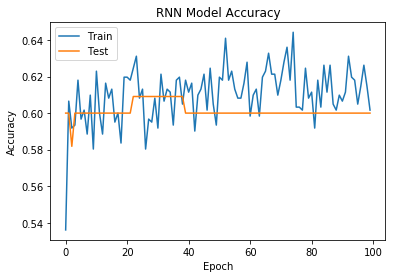

In [14]:
acc = []
val_acc = []
for history in history_list:
    acc.append(history.history['accuracy'])
    val_acc.append(history.history['val_accuracy'])
acc = np.array(acc)
val_acc = np.array(val_acc)
avg_acc = np.mean(acc, axis=0)
avg_val_acc = np.mean(val_acc, axis=0)
print(avg_val_acc)

plt.plot(avg_acc)
plt.plot(avg_val_acc)
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import CuDNNLSTM
from keras.layers import MaxPooling1D
from keras import regularizers
from keras import optimizers
from keras import initializers

n_samples = X_train.shape[0]  # number of data points
n_features = X_train.shape[1]  # dimension of feature vector for each sample
time_steps = X_train.shape[2] # how many samples across time were taken

model = Sequential()

model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, kernel_initializer='random_normal', input_shape=(n_features, time_steps)))

model.add(MaxPooling1D(pool_size=(2), strides=2, padding='valid', data_format=None))

model.add(LSTM(40, return_sequences=True))

model.add(LSTM(30, return_sequences=False))

model.add(Dense(2, activation='softmax', kernel_regularizer=regularizers.l1_l2(l1=0,l2=0.5)))

#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
Adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.99, amsgrad=False)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])

history=model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=100, epochs=100)


Get val and test scores

In [17]:
score_val = model.evaluate(X_val, y_val, batch_size=20)
score_test = model.evaluate(X_test, y_test, batch_size=20)

print('Validation [loss, accuracy] is ', score_val)
print('Test [loss, accuracy] is ', score_test)

26/26 [==============================] - 1s 43ms/step
Validation [loss, accuracy] is  [2.668516440825029, 0.6818181872367859]
Test [loss, accuracy] is  [2.6850311022538405, 0.5769230723381042]


In [ ]:
#RNN on MFCC raw data did pretty much nothing,v but CNN on statistics of raw data was able to classify (standard deviation and mean)
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()